# Ayudantía 02 - Visualización de datos

En esta ayudantía aprenderemos a visualizar datos con distintos tipos de gráficos y librerías

En primer lugar llamaremos las librerías que vamos a necesitar

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Limpieza de dataframes

Luego cargaremos los datasets necesarios y revisamos su información

In [113]:
codigos = pd.read_csv("codigos.csv", delimiter=';')
psu = pd.read_csv("psu_2019.csv", delimiter=';')
poblacion = pd.read_csv("poblacion.csv", delimiter=';')
presupuesto = pd.read_csv("presupuesto_2019.csv", delimiter=';')

In [114]:
codigos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Código Región       346 non-null    int64 
 1   Nombre Región       346 non-null    object
 2   Abreviatura Región  346 non-null    object
 3   Código Provincia    346 non-null    int64 
 4   Nombre Provincia    346 non-null    object
 5   Código Comuna 2018  346 non-null    int64 
 6   Nombre Comuna       346 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.0+ KB


In [115]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CODIGO     345 non-null    int64 
 1   MUNICIPIO  345 non-null    object
 2   POBLACIÓN  345 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.2+ KB


In [116]:
psu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CODIGO                  345 non-null    int64 
 1   MUNICIPIO               345 non-null    object
 2   MUNICIPALES_PRIMERA     345 non-null    object
 3   PARTICULARES_PRIMERA    345 non-null    object
 4   SUBVENCIONADOS_PRIMERA  345 non-null    object
 5   450_MUNICIPALES         345 non-null    object
 6   450_PARTICULARES        345 non-null    object
 7   450_SUBVENCIONADOS      345 non-null    object
dtypes: int64(1), object(7)
memory usage: 21.7+ KB


In [117]:
presupuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODIGO       345 non-null    int64 
 1   MUNICIPIO    345 non-null    object
 2   PRESUPUESTO  345 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB



Tanto el  _dataset_ de presupuesto como el de psu tienen valores tipo object cuando deberían ser int. Veamos estas filas

In [118]:
presupuesto[presupuesto['PRESUPUESTO'] == 'No Recepcionado']

,CODIGO,MUNICIPIO,PRESUPUESTO
63,5602,ALGARROBO,No Recepcionado
87,6110,MOSTAZAL,No Recepcionado


Ahora los reemplazamos por 0 y el tipo de dato a entero (int)

In [119]:
presupuesto = presupuesto.replace('No Recepcionado', 0)
presupuesto['PRESUPUESTO'] = presupuesto['PRESUPUESTO'].astype(int)

Revisamos la información para verificar que se haya hecho todo correctamente

In [120]:
presupuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODIGO       345 non-null    int64 
 1   MUNICIPIO    345 non-null    object
 2   PRESUPUESTO  345 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.2+ KB


Ahora hacemos lo mismo con el dataframe psu

In [121]:
psu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CODIGO                  345 non-null    int64 
 1   MUNICIPIO               345 non-null    object
 2   MUNICIPALES_PRIMERA     345 non-null    object
 3   PARTICULARES_PRIMERA    345 non-null    object
 4   SUBVENCIONADOS_PRIMERA  345 non-null    object
 5   450_MUNICIPALES         345 non-null    object
 6   450_PARTICULARES        345 non-null    object
 7   450_SUBVENCIONADOS      345 non-null    object
dtypes: int64(1), object(7)
memory usage: 21.7+ KB


Son varias las columnas con valores en object así reemplazamos en cada una de ellas y por último revisamos si se hizo el cambio correctamente

In [122]:
psu = psu.replace('No Recepcionado', 0)
psu['MUNICIPALES_PRIMERA']= psu['MUNICIPALES_PRIMERA'].astype(int)
psu['PARTICULARES_PRIMERA']= psu['PARTICULARES_PRIMERA'].astype(int)
psu['SUBVENCIONADOS_PRIMERA']= psu['SUBVENCIONADOS_PRIMERA'].astype(int)
psu['450_MUNICIPALES']= psu['450_MUNICIPALES'].astype(int)
psu['450_PARTICULARES']= psu['450_PARTICULARES'].astype(int)
psu['450_SUBVENCIONADOS']= psu['450_SUBVENCIONADOS'].astype(int)
psu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CODIGO                  345 non-null    int64 
 1   MUNICIPIO               345 non-null    object
 2   MUNICIPALES_PRIMERA     345 non-null    int64 
 3   PARTICULARES_PRIMERA    345 non-null    int64 
 4   SUBVENCIONADOS_PRIMERA  345 non-null    int64 
 5   450_MUNICIPALES         345 non-null    int64 
 6   450_PARTICULARES        345 non-null    int64 
 7   450_SUBVENCIONADOS      345 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 21.7+ KB


## Merge dataframes
Aprovecharemos de unir todos los dataframes en uno para poder realizar los ejercicios con mayor facilidad


In [123]:
df_extended=codigos.merge(presupuesto, left_on='Código Comuna 2018', right_on='CODIGO')
df_extended=df_extended.merge(poblacion, left_on='CODIGO', right_on='CODIGO')
df_extended=df_extended.merge(psu, left_on='CODIGO', right_on='CODIGO')
df_extended.head()

,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna,CODIGO,MUNICIPIO_x,PRESUPUESTO,MUNICIPIO_y,POBLACIÓN,MUNICIPIO,MUNICIPALES_PRIMERA,PARTICULARES_PRIMERA,SUBVENCIONADOS_PRIMERA,450_MUNICIPALES,450_PARTICULARES,450_SUBVENCIONADOS
0,1,Tarapacá,TPCA,11,Iquique,1101,Iquique,1101,IQUIQUE,59072234,IQUIQUE,216514,IQUIQUE,482,149,1177,153,142,843
1,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio,1107,ALTO HOSPICIO,13984411,ALTO HOSPICIO,124150,ALTO HOSPICIO,79,0,1012,48,0,483
2,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte,1401,POZO ALMONTE,7613962,POZO ALMONTE,16683,POZO ALMONTE,159,0,0,43,0,0
3,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña,1402,CAMIÑA,1584008,CAMIÑA,1345,CAMIÑA,8,0,0,1,0,0
4,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane,1403,COLCHANE,2500000,COLCHANE,1556,COLCHANE,5,0,0,1,0,0


Luego dejamos solo las columnas que nos interesan, eliminando repetidas

In [124]:
df_extended=df_extended[['Nombre Región','Abreviatura Región','Nombre Provincia','Nombre Comuna','PRESUPUESTO','POBLACIÓN','MUNICIPALES_PRIMERA','PARTICULARES_PRIMERA','SUBVENCIONADOS_PRIMERA','450_MUNICIPALES','450_PARTICULARES','450_SUBVENCIONADOS']]
df_extended.head()

,Nombre Región,Abreviatura Región,Nombre Provincia,Nombre Comuna,PRESUPUESTO,POBLACIÓN,MUNICIPALES_PRIMERA,PARTICULARES_PRIMERA,SUBVENCIONADOS_PRIMERA,450_MUNICIPALES,450_PARTICULARES,450_SUBVENCIONADOS
0,Tarapacá,TPCA,Iquique,Iquique,59072234,216514,482,149,1177,153,142,843
1,Tarapacá,TPCA,Iquique,Alto Hospicio,13984411,124150,79,0,1012,48,0,483
2,Tarapacá,TPCA,Tamarugal,Pozo Almonte,7613962,16683,159,0,0,43,0,0
3,Tarapacá,TPCA,Tamarugal,Camiña,1584008,1345,8,0,0,1,0,0
4,Tarapacá,TPCA,Tamarugal,Colchane,2500000,1556,5,0,0,1,0,0


## Barplots
Ahora graficaremos el presupuesto según PROVINCIA, la mejor manera de representar esto es a través de un gráfico de barras


Primero tenemos que agrupar según provincia y sumar los presupuestos

In [125]:
df_provincia=df_extended['PRESUPUESTO'].groupby(df_extended['Nombre Provincia']).sum()
df_provincia

Nombre Provincia
Aisén                        14903408
Antofagasta                 125254473
Antártica Chilena             2743100
Arauco                       36740374
Arica                        40286577
Biobío                       91034371
Cachapoal                   135528497
Capitán Prat                  5570938
Cardenal Caro                29177075
Cauquenes                    17984735
Cautín                      175308840
Chacabuco                    91108229
Chañaral                     10720168
Chiloé                       58310331
Choapa                       29171918
Coihaique                    15156740
Colchagua                    53293859
Concepción                  196161773
Copiapó                      44818187
Cordillera                  100112250
Curicó                       69422287
Diguillín                    66246039
El Loa                       56169539
Elqui                       136567407
General Carrera               6386741
Huasco                       1937

Extraemos los nombres de las provincias con el código keys(), ya que matplotlib no trabaja con dataframes 

In [126]:
df_provincia.keys()

Index(['Aisén', 'Antofagasta', 'Antártica Chilena', 'Arauco', 'Arica',
       'Biobío', 'Cachapoal', 'Capitán Prat', 'Cardenal Caro', 'Cauquenes',
       'Cautín', 'Chacabuco', 'Chañaral', 'Chiloé', 'Choapa', 'Coihaique',
       'Colchagua', 'Concepción', 'Copiapó', 'Cordillera', 'Curicó',
       'Diguillín', 'El Loa', 'Elqui', 'General Carrera', 'Huasco', 'Iquique',
       'Isla de Pascua', 'Itata', 'Limarí', 'Linares', 'Llanquihue',
       'Los Andes', 'Magallanes', 'Maipo', 'Malleco', 'Marga Marga',
       'Melipilla', 'Osorno', 'Palena', 'Parinacota', 'Petorca', 'Punilla',
       'Quillota', 'Ranco', 'San Antonio', 'San Felipe de Aconcagua',
       'Santiago', 'Talagante', 'Talca', 'Tamarugal', 'Tierra del Fuego',
       'Tocopilla', 'Valdivia', 'Valparaíso', 'Última Esperanza'],
      dtype='object', name='Nombre Provincia')

Luego creamos el gráfico mediante matplotlib

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 <a list of 56 Text major ticklabel objects>)

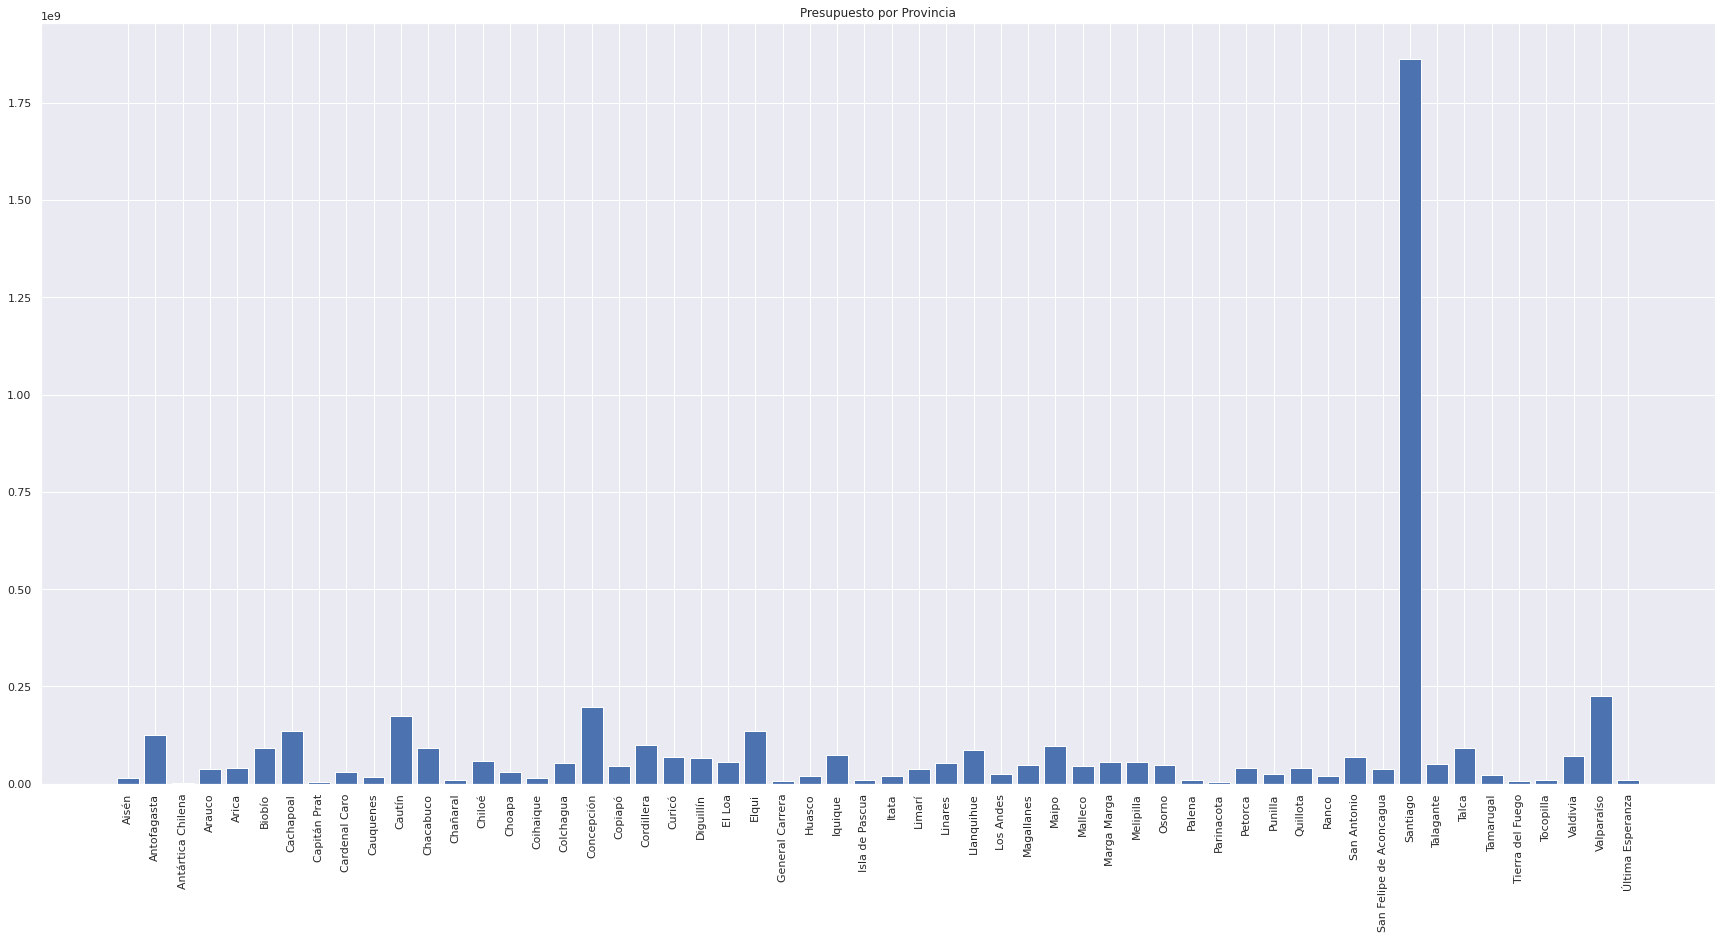

In [127]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,14)) #Modificamos el tamaño para que se vea de mejor manera 
plt.title("Presupuesto por Provincia")
plt.bar(df_provincia.keys(),df_provincia)
plt.xticks(rotation=90) #Rotamos los títulos para que puedan verse de mejor manera

## Histogramas
Haremos un histograma que visualice la distribución de PRESUPUESTO de la Región de Coquimbo

Primero filtraremos los resultados para tener un dataframe exclusivo con la Región de Coquimbo y las columnas que necesitamos

In [128]:
coquimbo = df_extended[(df_extended["Nombre Región"]=="Coquimbo")]
coquimbo = coquimbo[["Nombre Región",'Nombre Comuna','PRESUPUESTO']]
coquimbo


,Nombre Región,Nombre Comuna,PRESUPUESTO
25,Coquimbo,La Serena,59222000
26,Coquimbo,Coquimbo,56819394
27,Coquimbo,Andacollo,3586345
28,Coquimbo,La Higuera,4090360
29,Coquimbo,Paiguano,4780000
30,Coquimbo,Vicuña,8069308
31,Coquimbo,Illapel,6299700
32,Coquimbo,Canela,3000000
33,Coquimbo,Los Vilos,7103931
34,Coquimbo,Salamanca,12768287


Ahora creamos el histograma utilizando Seaborn

Escogemos el tema, el color del gráfico, la cantidad de bins, la transparencia y el título.

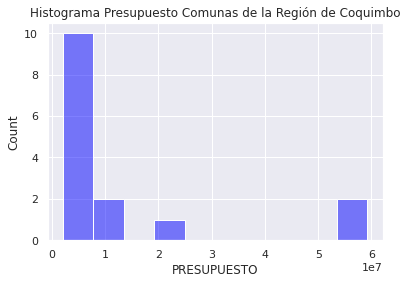

In [129]:
sns.set_theme()
sns.histplot(data=coquimbo, x="PRESUPUESTO",  color="blue", alpha=0.5,bins=10)
plt.title('Histograma Presupuesto Comunas de la Región de Coquimbo');

Visualizando el gráfico podemos notar que no se puede obtener mucha información, ya que muestra pocas barras y muy separadas entre sí



### Escala logaritmica
Cuando esto ocurre podemos aplicar escala logaritmica a los valores del presupuesto y así visualizar si se aprecia de mejor manera con el siguiente código

Hacemos una copia del dataframe para poder utilizar por separado tanto el dataframe con el presupuesto logaritmico como el sin

In [130]:
import copy
coquimbo_log= coquimbo.copy()
coquimbo_log['PRESUPUESTO'] = np.log(coquimbo_log['PRESUPUESTO'] + 1)

Luego volvemos a crear el gráfico

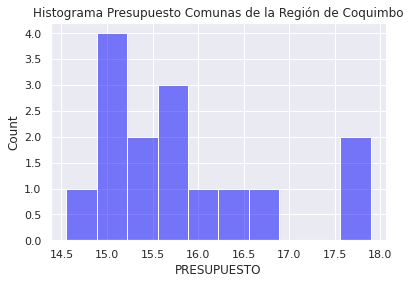

In [131]:
sns.set_theme()
sns.histplot(data=coquimbo_log, x="PRESUPUESTO",  color="blue", alpha=0.5,bins=10)
plt.title('Histograma Presupuesto Comunas de la Región de Coquimbo');

De esta manera la distribución se aprecian de mejor

### Dos histogramas en el mismo gráfico
Probemos ahora agregar además el histograma de la región metropolitana

Los mismos pasos de la vez anterior:

1.   Crear el dataframe filtrado solo con la Región Metropolitana 
2.   Filtramos las columnas que vamos a utilizar



In [132]:
santiago = df_extended[(df_extended["Nombre Región"]=="Metropolitana de Santiago")]
santiago = santiago[['Nombre Comuna','PRESUPUESTO']]
santiago

,Nombre Comuna,PRESUPUESTO
256,Santiago,163383547
257,Cerrillos,21631584
258,Cerro Navia,33120130
259,Conchalí,36648910
260,El Bosque,26147357
261,Estación Central,30377059
262,Huechuraba,36044000
263,Independencia,19922968
264,La Cisterna,15090000
265,La Florida,95609849


Ahora creamos un gráfico en Seaborn con ambos histogramas, con colores diferentes y transparencia para poder visualizarlos de mejor manera

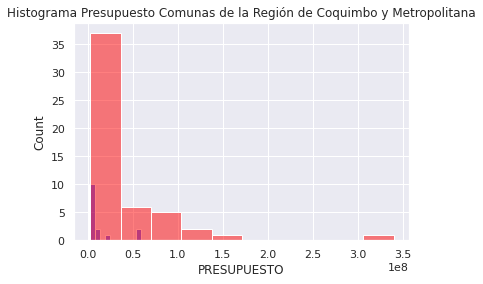

In [133]:
sns.set_theme()
sns.histplot(data=coquimbo, x="PRESUPUESTO",  color="blue", alpha=0.5,bins=10)
sns.histplot(data=santiago, x="PRESUPUESTO",  color="red", alpha=0.5,bins=10)
plt.title('Histograma Presupuesto Comunas de la Región de Coquimbo y Metropolitana');

En el gráfico no se puede apreciar cada región correctamente por lo que utilizaremos la versión con escala logaritmica en ambas y analizaremos

In [134]:
santiago_log= santiago.copy()
santiago_log['PRESUPUESTO'] = np.log(santiago_log['PRESUPUESTO'] + 1)

Luego mostraremos los histogramas

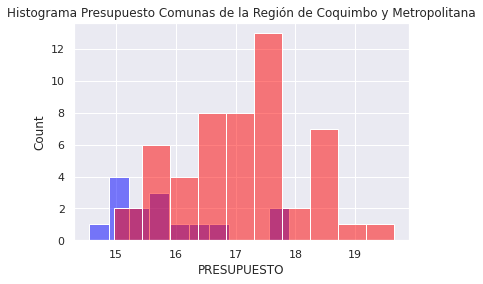

In [135]:
sns.set_theme()
sns.histplot(data=coquimbo_log, x="PRESUPUESTO",  color="blue", alpha=0.5,bins=10)
sns.histplot(data=santiago_log, x="PRESUPUESTO",  color="red", alpha=0.5,bins=10)
plt.title('Histograma Presupuesto Comunas de la Región de Coquimbo y Metropolitana');

Hay mejoría pero vale la pena analizar como se verían por separado cada histograma

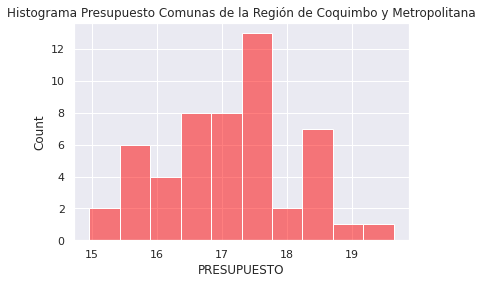

In [136]:
sns.set_theme()
#sns.histplot(data=coquimbo_log, x="PRESUPUESTO",  color="blue", alpha=0.5,bins=10)
sns.histplot(data=santiago_log, x="PRESUPUESTO",  color="red", alpha=0.5,bins=10)
plt.title('Histograma Presupuesto Comunas de la Región de Coquimbo y Metropolitana');

## Scatter plot
Haremos un scatter plot entre el presupuesto y la población por comunas de Chile

Primero pasamos la escala a logaritmo tanto del presupuesto como de la población para mejorar la visualización

In [137]:
df_extended['PRESUPUESTO'] = np.log(df_extended['PRESUPUESTO'] + 1)
df_extended['POBLACIÓN'] = np.log(df_extended['POBLACIÓN'] + 1)

Luego pasamos al código del gráfico con Sea Born

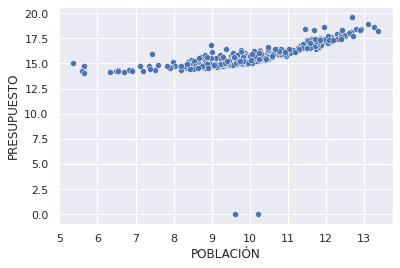

In [138]:
sns.scatterplot(x="POBLACIÓN", y="PRESUPUESTO", data=df_extended)

Se puede utilizar hue para marcar lo que queramos como por ejemplo el nombre de la región

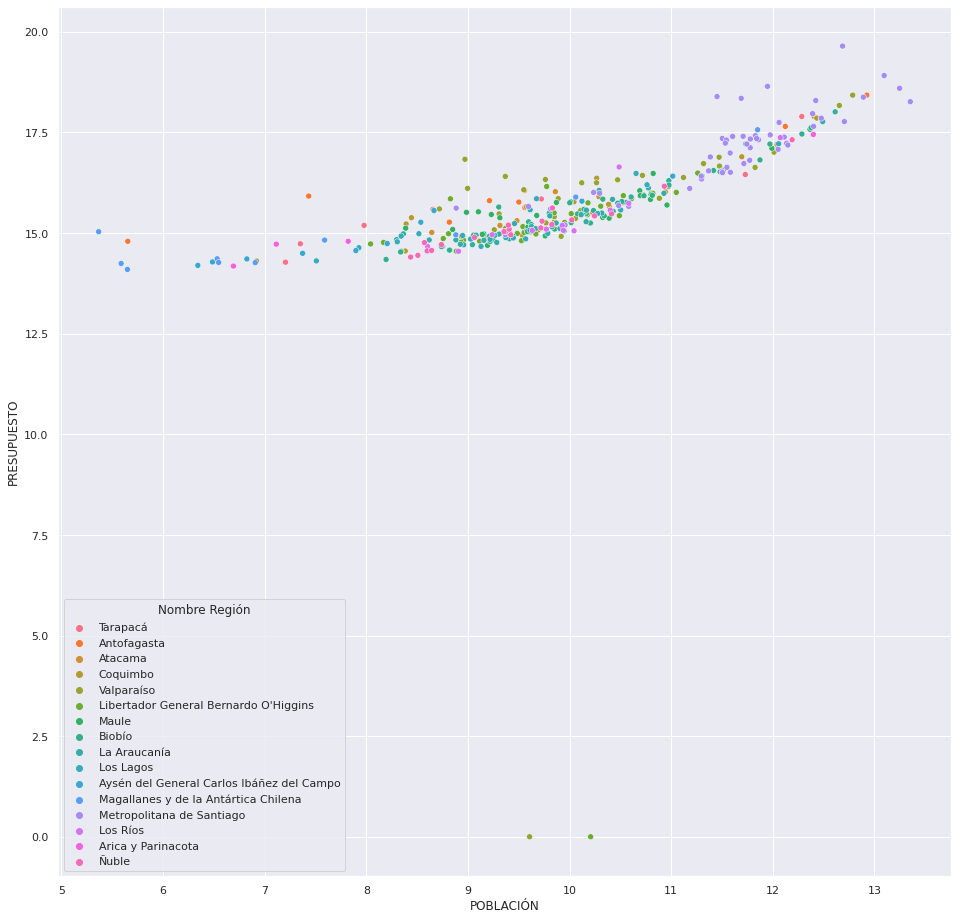

In [139]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x="POBLACIÓN", y="PRESUPUESTO", data=df_extended, hue='Nombre Región')

No hace mucho sentido ya que con tanta región los colores no se aprecian, pero podemos hacer otro tipo de filtro como dividir por si son de la región Metropolitana o no

Primero se debe crear la columna en que se diga si pertenece o no la capital. Hay varias maneras, en este caso utilicé loc

In [140]:
df_extended.loc[df_extended['Nombre Región'] != 'Metropolitana de Santiago', 'Capital'] = 'Otra Región'
df_extended.loc[df_extended['Nombre Región'] == 'Metropolitana de Santiago', 'Capital'] = 'Metropolitana' 
df_extended

,Nombre Región,Abreviatura Región,Nombre Provincia,Nombre Comuna,PRESUPUESTO,POBLACIÓN,MUNICIPALES_PRIMERA,PARTICULARES_PRIMERA,SUBVENCIONADOS_PRIMERA,450_MUNICIPALES,450_PARTICULARES,450_SUBVENCIONADOS,Capital
0,Tarapacá,TPCA,Iquique,Iquique,17.894272,12.285415,482,149,1177,153,142,843,Otra Región
1,Tarapacá,TPCA,Iquique,Alto Hospicio,16.453454,11.729254,79,0,1012,48,0,483,Otra Región
2,Tarapacá,TPCA,Tamarugal,Pozo Almonte,15.845494,9.722205,159,0,0,43,0,0,Otra Región
3,Tarapacá,TPCA,Tamarugal,Camiña,14.275470,7.204893,8,0,0,1,0,0,Otra Región
4,Tarapacá,TPCA,Tamarugal,Colchane,14.731802,7.350516,5,0,0,1,0,0,Otra Región
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Ñuble,NUBLE,Punilla,San Carlos,16.163040,10.931963,156,0,395,62,0,297,Otra Región
341,Ñuble,NUBLE,Punilla,Coihueco,15.425187,10.245232,66,0,63,32,0,36,Otra Región
342,Ñuble,NUBLE,Punilla,Ñiquén,15.035366,9.355047,44,0,0,15,0,0,Otra Región
343,Ñuble,NUBLE,Punilla,San Fabián,14.402464,8.435549,40,0,0,23,0,0,Otra Región


Luego podemos pasar directamente al gráfico y utilizar hue para dividir por nuestra nueva columna Capital

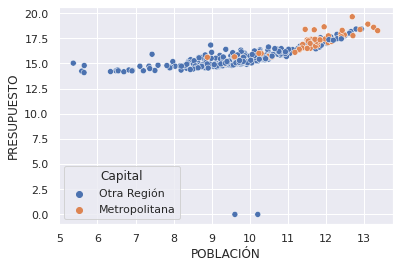

In [141]:
sns.scatterplot(x="POBLACIÓN", y="PRESUPUESTO", data=df_extended, hue="Capital")

## Boxplot
Para aprender a crear boxplots haremos uno múltiple sobre la proporción de alumnos que dan la psu por primera vez y los que obtuvieron menos de 450 puntos

Primero creamos las columnas necesarias

In [142]:
df_extended['p_municipal']=1- df_extended['450_MUNICIPALES']/df_extended['MUNICIPALES_PRIMERA']
df_extended['p_particular']=1- df_extended['450_PARTICULARES']/df_extended['PARTICULARES_PRIMERA']
df_extended['p_subvencionados']=1- df_extended['450_SUBVENCIONADOS']/df_extended['SUBVENCIONADOS_PRIMERA']

Luego nos quedamos solo con las que vamos a utilizar para graficar. Eliminamos los valores nulos para que no interfieran con la distribución 

In [144]:
df_p=df_extended[['Nombre Comuna','p_municipal','p_particular','p_subvencionados']]
df_p=df_p.dropna(axis=0)

Luego con el comando melt podemos dejar solo una columna que contenga la información de las proporciones calculadas y de esta manera graficar más facilmente

In [145]:
df_melt = df_p.melt(
    id_vars=["Nombre Comuna"], 
    var_name="Proporción", 
    value_name="Valores"
)
df_melt

,Nombre Comuna,Proporción,Valores
0,Iquique,p_municipal,0.682573
1,Antofagasta,p_municipal,0.582683
2,Calama,p_municipal,0.407357
3,Copiapó,p_municipal,0.588146
4,Vallenar,p_municipal,0.560000
...,...,...,...
229,Peñaflor,p_subvencionados,0.482633
230,Valdivia,p_subvencionados,0.278589
231,La Unión,p_subvencionados,0.508130
232,Arica,p_subvencionados,0.378134


Finalmente graficamos con seaborn

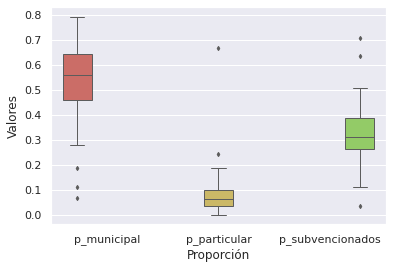

In [146]:
ax = sns.boxplot(
    x="Proporción", y="Valores", data=df_melt, hue="Proporción",
    palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3
)
plt.legend([],[], frameon=False)